In [14]:
# Importing Statements
import numpy as np
import pandas as pd
import os
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, BatchNormalization, Dropout, Input, Lambda
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
data_folder = 'att-database-of-faces'

# Loading the Directory
list_of_dirs = []

for dir_ in os.listdir(data_folder):
    if os.path.isdir(os.path.join(data_folder, dir_)):
        list_of_dirs.append(dir_)

In [3]:
len(list_of_dirs)

40

In [4]:
# Reading the Images
#for dir_ in list_of_dirs:
 #   for image in os.listdir(os.path.join(data_folder, dir_)):
        

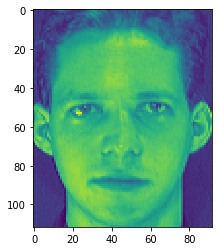

In [5]:
# Reading the Image
image_path = os.path.join(data_folder, 's1', '1.pgm')

image = cv.imread(image_path, 0)
plt.imshow(image)

In [6]:
image.shape

(112, 92)

Before Normalization : 
[[48 49 45 ... 56 56 54]
 [45 52 39 ... 52 50 51]
 [45 50 42 ... 48 53 50]
 ...
 [50 48 50 ... 45 46 46]
 [45 54 49 ... 46 47 47]
 [51 51 51 ... 47 46 46]]
Plotting the Image before Normalization : 


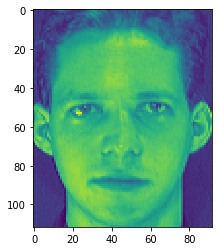

In [7]:
print("Before Normalization : ")
print(image)

print("Plotting the Image before Normalization : ")
plt.imshow(image)

After Normalization : 
[[0.18823529 0.19215686 0.17647059 ... 0.21960784 0.21960784 0.21176471]
 [0.17647059 0.20392157 0.15294118 ... 0.20392157 0.19607843 0.2       ]
 [0.17647059 0.19607843 0.16470588 ... 0.18823529 0.20784314 0.19607843]
 ...
 [0.19607843 0.18823529 0.19607843 ... 0.17647059 0.18039216 0.18039216]
 [0.17647059 0.21176471 0.19215686 ... 0.18039216 0.18431373 0.18431373]
 [0.2        0.2        0.2        ... 0.18431373 0.18039216 0.18039216]]
Plotting the image after normalization : 


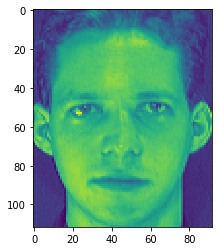

In [8]:
# Normalizing the image
print("After Normalization : ")
image = image / 255.0

print(image)

print("Plotting the image after normalization : ")
plt.imshow(image)

In [11]:
# Variables
data_length = 10000
image_dims = (56, 46, 3)
count = 0
size = 2

# Praparing the data
X_similar = np.zeros((data_length, 2, 1, image_dims[0], image_dims[1]))
X_dissimilar = np.zeros((data_length, 2, 1, image_dims[0], image_dims[1]))
y_similar = np.zeros((data_length, 1))
y_dissimilar = np.zeros((data_length, 1))

In [12]:
# Making the pairs of the similar images

for dir_ in list_of_dirs:
    for index in range(int(data_length/len(list_of_dirs))):
        index_1 = 0
        index_2 = 0
        
        while index_1 == index_2:
            index_1 = np.random.randint(10)
            index_2 = np.random.randint(10)
            
            
        # Reading the image present at index_1 and index_2 in current dir
        image_1 = cv.imread(os.path.join(data_folder, dir_, str(index_1+1)+'.pgm'), 0)
        image_2 = cv.imread(os.path.join(data_folder, dir_, str(index_2+1)+'.pgm'), 0)
        
        
        # Reducing the size of the image
        image_1 = image_1[::2, ::2]
        image_2 = image_2[::2, ::2]
        
        # Normalizing the Image
        image_1 = image_1 / 255.0
        image_2 = image_2 / 255.0
        
        X_similar[count, 0, 0, :, :] = image_1
        X_similar[count, 1, 0, :, :] = image_2
        
        y_similar[count] = 1
        
        count += 1
        
        

In [13]:
#X_similar

In [14]:
# Making the pairs of dissimilar images

for point in range(data_length):
    dir_1 = 0
    dir_2 = 0
    index_1 = 0
    index_2 = 0
    
    while dir_1 == dir_2:
        dir_1 = np.random.randint(40)
        dir_2 = np.random.randint(40)
        
    index_1 = np.random.randint(10)
    index_2 = np.random.randint(10)
    
    # Reading the image at index_1 and index_2 in dir_1 and dir_2
    image_1 = cv.imread(os.path.join(data_folder, 's'+str(dir_1+1), str(index_1+1)+'.pgm'), 0)
    image_2 = cv.imread(os.path.join(data_folder, 's'+str(dir_2+1), str(index_2+1)+'.pgm'), 0)
    
    
    # Reducing the size of the image
    image_1 = image_1[::2, ::2]
    image_2 = image_2[::2, ::2]
        
    # Normalizing the Image
    image_1 = image_1 / 255.0
    image_2 = image_2 / 255.0
    
    X_dissimilar[point, 0,  0, :, :] = image_1
    X_dissimilar[point, 1,  0, :, :] = image_2
    y_dissimilar[point] = 0
    
    

In [15]:
X_similar.shape

(10000, 2, 1, 56, 46)

In [16]:
X_dissimilar.shape

(10000, 2, 1, 56, 46)

In [17]:
# Saving the model
import pickle as pkl

In [18]:
#pkl.dump(X_similar, 'X_similar')

In [19]:
X = np.concatenate([X_similar, X_dissimilar], axis=0)
y = np.concatenate([y_similar, y_dissimilar], axis=0)

In [20]:
X.shape

(20000, 2, 1, 56, 46)

In [21]:
y.shape

(20000, 1)

In [22]:
# Saving the Data
np.save('X.npy', X)
np.save('y.npy', y)

In [23]:
# Loading the Data
X = np.load('X.npy')
y = np.load('y.npy')

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [25]:
# Saving the Training and Testing Data
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

In [2]:
# Loading the Training and Testing Data
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [43]:
# Building the model
model = Sequential([
    
    # First Convolution
    Conv2D(32, kernel_size=(3, 3), padding='valid', strides=(1, 1), activation='relu', input_shape=(1, 56, 46), data_format='channels_first'),
    BatchNormalization(),
    
    Conv2D(32, kernel_size=(3, 3), padding='valid', strides=(1, 1), activation='relu', data_format='channels_first'),
    BatchNormalization(),
    
    MaxPool2D(pool_size=(2, 2)),
    
    Dropout(0.2),
    
#     # Second Convolution
#     Conv2D(64, kernel_size=(3, 3), padding='valid', strides=(1, 1), activation='relu'),
#     BatchNormalization(),
    
#     Conv2D(64, kernel_size=(3, 3), padding='valid', strides=(1, 1), activation='relu'),
#     BatchNormalization(),
    
#     MaxPool2D(pool_size=(2, 2)),
    
#     Dropout(0.3),
    
    
#     # Third Convolution
#     Conv2D(128, kernel_size=(3, 3), padding='valid', strides=(1, 1), activation='relu'),
#     BatchNormalization(),
    
#     Conv2D(128, kernel_size=(3, 3), padding='valid', strides=(1, 1), activation='relu'),
#     BatchNormalization(),
    
#     MaxPool2D(pool_size=(2, 2)),
    
#     Dropout(0.5),
    
    # Fourth Convolution
#     Conv2D(512, kernel_size=(3, 3), padding='valid', strides=(1, 1), activation='relu'),
#     BatchNormalization(),
    
#     Conv2D(512, kernel_size=(3, 3), padding='valid', strides=(1, 1), activation='relu'),
#     BatchNormalization(),
    
#     MaxPool2D(pool_size=(2, 2)),
    
#     Dropout(0.5),
    
    
    # Flattening the output
    Flatten(),
    
    # Adding Fully Connected Layers to the model
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(50, activation='relu')
])

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 54, 44)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 54, 44)        176       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 52, 42)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 52, 42)        168       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 26, 42)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 26, 42)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 17472)            

In [45]:
X_train.shape[2:]

(1, 56, 46)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15000, 2, 1, 56, 46), (5000, 2, 1, 56, 46), (15000, 1), (5000, 1))

In [47]:
#X_train1 = np.reshape(X_train, (15000, 2, 112, 92, -1))
#X_test1 = np.reshape(X_test, (5000, 2, 112, 92, -1))

In [48]:
#X_train1.shape

In [49]:
#X_train1[0, 0]

In [50]:
X_train[0, 0]

array([[[0.45882353, 0.45098039, 0.44705882, ..., 0.43529412,
         0.42745098, 0.43921569],
        [0.45098039, 0.44705882, 0.44705882, ..., 0.43137255,
         0.43137255, 0.43529412],
        [0.44705882, 0.45098039, 0.43529412, ..., 0.42745098,
         0.42352941, 0.42745098],
        ...,
        [0.08627451, 0.06666667, 0.07058824, ..., 0.15294118,
         0.17254902, 0.15686275],
        [0.08235294, 0.15686275, 0.17254902, ..., 0.23529412,
         0.29411765, 0.26666667],
        [0.21568627, 0.2627451 , 0.22745098, ..., 0.29411765,
         0.32156863, 0.30588235]]])

In [51]:
input_dim = X_train.shape[2:]
img_a = Input(shape=input_dim)
img_b = Input(shape=input_dim)

#base_network = build_base_network(input_dim)
feat_vecs_a = model(img_a)
feat_vecs_b = model(img_b)

In [52]:
def euclidean_distance(vects):
    x, y = vects
    return keras.backend.sqrt(keras.backend.sum(keras.backend.square(x - y), axis=1, keepdims=True))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

distance = Lambda(euclidean_distance, output_shape=eucl_dist_output_shape)([feat_vecs_a, feat_vecs_b])

In [53]:
final_model = Model(inputs=[img_a, img_b], outputs=distance)

In [54]:
def contrastive_loss(y_true, y_pred):
    margin = 1
    return keras.backend.mean(y_true * keras.backend.square(y_pred) + (1 - y_true) * keras.backend.square(keras.backend.maximum(margin - y_pred, 0)))

final_model.compile(loss=contrastive_loss, optimizer='adam', metrics=['accuracy'])

In [55]:
epochs = 10

img_1 = X_train[:, 0]
img_2 = X_train[:, 1] 

final_model.fit([img_1, img_2], y_train, validation_split=.25, batch_size=128, verbose=1, epochs=epochs)

Epoch 1/10


InvalidArgumentError:  Conv2DCustomBackpropInputOp only supports NHWC.
	 [[node gradient_tape/model_1/sequential_2/conv2d_5/Conv2DBackpropInput (defined at <ipython-input-55-bc7326df02d9>:6) ]] [Op:__inference_train_function_5069]

Function call stack:
train_function


In [29]:
img_1.shape

(15000, 1, 112, 92)